# **Practice Project: Insurance Cost Analysis**

Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will:
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

## Data Preprocessing

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

df = pd.read_csv(path, header=None)
print(df.head(3))

    0  1      2  3  4  5           6
0  19  1  27.90  0  1  3  16884.9240
1  18  2  33.77  1  0  4   1725.5523
2  28  2  33.00  3  0  4   4449.4620


In [4]:
# add header to dataframe
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
print(df.head(3))

  age  gender    bmi  no_of_children smoker  region     charges
0  19       1  27.90               0      1       3  16884.9240
1  18       2  33.77               1      0       4   1725.5523
2  28       2  33.00               3      0       4   4449.4620


In [5]:
# handle missing values caraterised by '?'.
# reolace '?' with NaN
df.replace('?', np.nan, inplace = True)

In [6]:
#identify column with missing values(NaN)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


<p> columns 'age' and 'smokers' have missing values </p>
<b> Handle missing values and data types column </b>

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.

In [8]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df.replace({"smoker" : np.nan}, is_smoker, inplace=True)


In [10]:
# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df.replace({"age" : np.nan}, mean_age,  inplace=True)

In [11]:
# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

In [12]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int32  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB
None


In [13]:
#roud by 2 decimal the column 'charges'
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())

   age  gender     bmi  no_of_children  smoker  region   charges
0   19       1  27.900               0       1       3  16884.92
1   18       2  33.770               1       0       4   1725.55
2   28       2  33.000               3       0       4   4449.46
3   33       2  22.705               0       0       1  21984.47
4   32       2  28.880               0       0       1   3866.86


## : Exploratory Data Analysis 

In [16]:
df_copie = df[["age", "bmi", "no_of_children",  "charges"]]
df_copie.corr()

,age,bmi,no_of_children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
no_of_children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


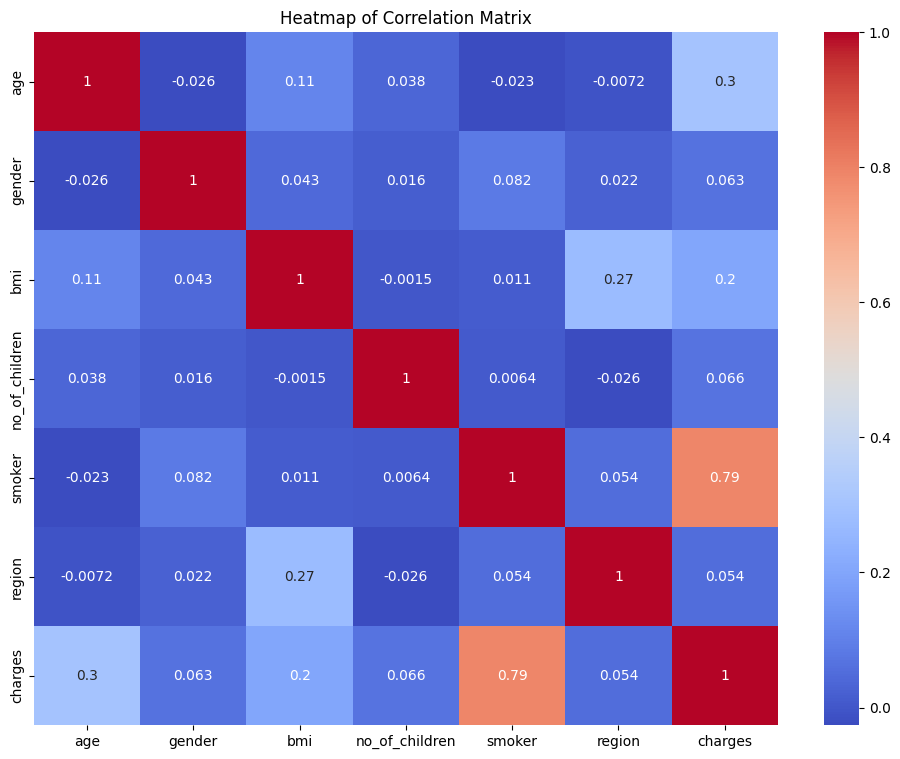

In [22]:
#look more about correlation
# Heatmap for correlations
plt.figure(figsize=(12, 9))
sns.heatmap(df_copie.corr(), annot=True, cmap='coolwarm',)
plt.title('Heatmap of Correlation Matrix')

plt.show()

<p> none of selected feature has a good correlation with charges </p>
<p> let look feature 'gender', 'smoker' and'region'

<Axes: xlabel='gender', ylabel='charges'>

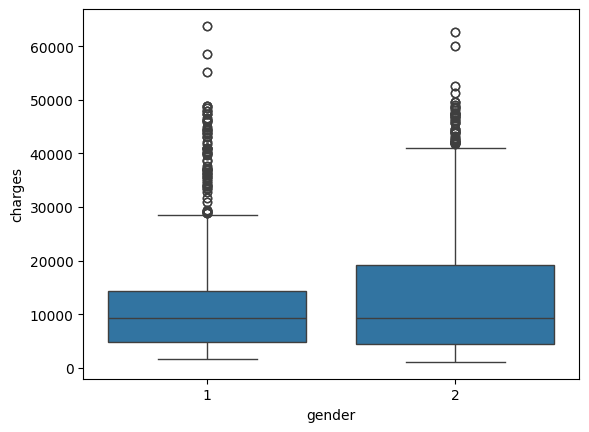

In [18]:
sns.boxplot(x="gender", y="charges", data=df)

gender may not be a good predictor for the charge 

<Axes: xlabel='smoker', ylabel='charges'>

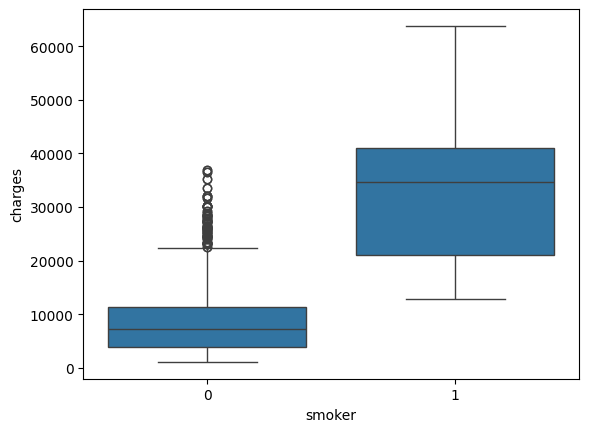

In [19]:
sns.boxplot(x="smoker", y="charges", data=df)

Here we see that the distribution of charge between these two moker categoriesr are distinct enough to take smoker as a potential good predictor of charge.

<Axes: xlabel='region', ylabel='charges'>

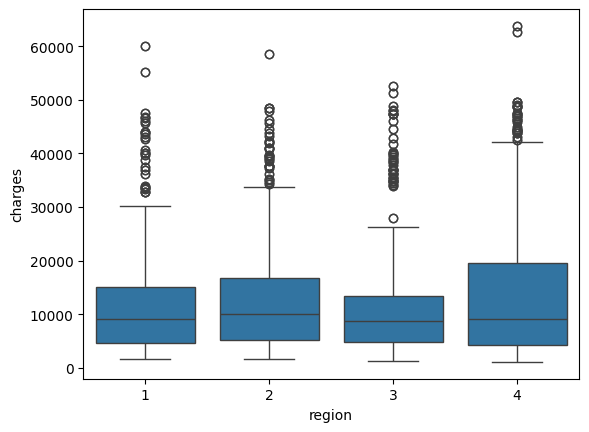

In [20]:
sns.boxplot(x="region", y="charges", data=df)


We see that the distributions of charges between the different region categories have a significant overlap, so region would not be a good predictor of charge. 

<b> let look more about feature smooker </b>

In [21]:
df['smoker'].value_counts()

smoker
0    2208
1     564
Name: count, dtype: int64

### conclusion: 
only feature smoker seem to be a good predictor
